# In machine learning, there exists two type of models - regressors and classifiers
### classifiers are binary problems (yes or no) or simply where all outputs are known (is it a dog, cat, or rabbit?)
###  regressors are numerical problems (predict house price in next 2 years) or simply where the output is unknown

### Use them wisely for datasets that fall in either of the 2 above categories. Using them incorrectly will affect accuracy of model significantly.

In [ ]:
import pandas as pd            
from sklearn import linear_model

# Linear regression model 
Simplest of the machine learning models

Follows the y= mx + b equation

We have the **y & x** values, and through training we determine the **m & b** values


In [ ]:
df = pd.read_csv("datasets/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


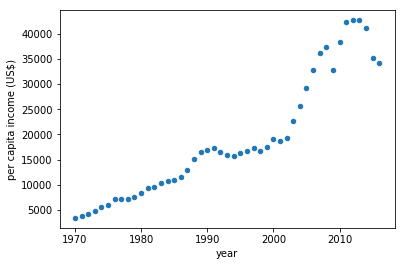

In [ ]:
df.plot(kind = "scatter", x = "year", y = "per capita income (US$)")

In [ ]:
new_df = df.drop("per capita income (US$)", axis = "columns")
# We need to get the independent variable (AKA features) alone in a new dataframe
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [ ]:
model = linear_model.LinearRegression()                      # specify which type of regression is to be used
model.fit(new_df, df["per capita income (US$)"])             # fit == trains the model, new_df == the x value, df["per capita"] == y value

predict_df = pd.DataFrame({"year": [2020,2030,2050,2090]})   
result = model.predict(predict_df)                           # Make sure to give a 2D array (or dataframe) as the input for predict
predict_df["GDP Capita (USD)"] = result                     
predict_df

,year,GDP Capita (USD)
0,2020,41288.694094
1,2030,49573.344847
2,2050,66142.646351
3,2090,99281.249360


In [ ]:
print("The slope of the model:", model.coef_)
print("The y-int of the model:", model.intercept_)

# We get these values from training the model which finds the best linear line for the data
# then it uses the y=mx+b equation where x = year to find a predicted y values = GDP per capita at x year

The slope of the model: [828.46507522]
The y-int of the model: -1632210.7578554575


## Linear regression with mutiple independent variables/features
Determine the salary of a person based on 3 features

Follows y = m1x + m2x + m3x + b equation where the x represent different features

In [ ]:
data = pd.read_csv("datasets/hiring_info.csv")
data

# We need to fill the NaN values and convert the experience column from string to int

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
data["test_score(out of 10)"] = data["test_score(out of 10)"].fillna(5)
#

new_data = data.drop(["salary($)", "experience"], axis = "columns")
new_data["experience(years)"] = [1,1,5,2,7,3,10,11]                   
# Add new experience column with int type

new_data

,test_score(out of 10),interview_score(out of 10),experience(years)
0,8.0,9,1
1,8.0,6,1
2,6.0,7,5
3,10.0,10,2
4,9.0,6,7
5,7.0,10,3
6,5.0,7,10
7,7.0,8,11


In [ ]:
new_model = linear_model.LinearRegression()             
new_model.fit(new_data, data["salary($)"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = pd.DataFrame({"test score": [8,8,10,5,7,10], "interview score": [10,5,7,9,3,10], "experience": [5,8,2,10,15,25]})
model_result = new_model.predict(predict)
predict["Salary($)"] = model_result
predict

,test score,interview score,experience,Salary($)
0,8,10,5,69202.538703
1,8,5,8,67283.562443
2,10,7,2,56450.777149
3,5,9,10,76844.038592
4,7,3,15,83700.414514
5,10,10,25,140640.255832


## One Hot Encoding (OHE) and linear regression with nominal variables
Example: predict price of a house based on **sqft** and **area** (nominal independent variable) in which the house is situated.

We use OHE to include non-numeric data types into a regression model

Note: Nominal variables is non-numeric data that can not be ordered, whereas ordinal variables is non-numeric data that can be ordered. Hot, hotter, hottest or soft, softer, softest for example.

In [ ]:
dataframe = pd.read_csv("datasets/carprices.csv")

ohe = pd.get_dummies(dataframe["Car Model"])
# We apply OHE to the different car models in the dataframe
# Each attribute (car models) will have value either 0 or 1, representing presence or absence of that attribute
# For one attribute to be "present" it will have 1 as its value, while all the other attributes will have 0

ohe
# When using OHE to train a model we must remove one attribute in order to avoid the "dummy variable trap" --- a statistical term that we dont need to worry about
# If we take out one attribute we can still find that attribute using the other attributes
# For example, below if we take out Mercedez Benz we can still figure out where it is "present" by finding the indices where both Audi & BMW == 0, which is [9-12]

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [ ]:
joined_df = dataframe.join(ohe)
features = joined_df.drop(["Car Model", "Sell Price($)", "Audi A5"], axis = "columns")
# We take out the sell price (dependent variable) as well as one OHE feature - Audi

features.head()
# This is the dataframe that includes all our independent variables

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0


In [ ]:
ohe_model = linear_model.LinearRegression()
ohe_model.fit(features, dataframe["Sell Price($)"])  

predict_model = pd.DataFrame({"mileage": [20000, 88000, 2000, 0, 65000], "Age": [1,5,3,0,12], "BMW": [0,0,1,1,0], "Mercedez": [1,1,0,0,0]})
result_model = ohe_model.predict(predict_model)
predict_model["Price"] = result_model

predict_model
# Last one in the dataframe is the price for an AUDI since both BMW & Mercedez == 0

,mileage,Age,BMW,Mercedez,Price
0,20000,1,0,1,50241.730453
1,88000,5,0,1,19743.613524
2,2000,3,1,0,47500.813571
3,0,0,1,0,52238.418643
4,65000,12,0,0,16475.705565


In [ ]:
model_acr = ohe_model.score(features, dataframe["Sell Price($)"])
print("Accuracy of model (%):", model_acr*100)

# Gives us the accuracy of our model --> 94%
# How it works: model.score(x,y) internally calculates y'= model.predict(x) and then compares y' against y to give an accuracy measure
# So even if we dont have a test dataset, score can use train dataset to find accuracy

Accuracy of model (%): 94.17050937281083


## Training and testing data by splitting the model

In [ ]:
from sklearn import model_selection

all_data = pd.read_csv("datasets/carprices.csv")

x = all_data[["Mileage", "Age(yrs)"]]
# This will be our features

y = all_data["Sell Price($)"]
# This is our result which we will use to train and test our model

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.35, random_state = 5)  

# test_size == percent of dataset that we want to set aside for testing. Here we chose 35%, default is 25%

# random_state == freezes the train & test datasets for 5 executions so they dont change each time we run the cell
# random_state is good to use when writing code but remove it to see how accurate the model is really

# x_train & y_train == part of dataset that the model will train on
# x_test & y_test == part of dataset that the model will test on to find accuracy of the model


In [ ]:
split_model = linear_model.LinearRegression()
split_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict_y = pd.DataFrame(split_model.predict(x_test), columns = ["predicted y_test from x_test"])

actual_y = pd.DataFrame(y_test).rename(columns = {"Sell Price($)": "actual y_test"}, index = {2: 0, 5: 1, 17: 2, 19:3, 12:4, 1: 5, 11: 6})
# Dont worry about this line. I just renamed the columns and the indices so both dataframes can be merged properly

actual_y.join(predict_y)
# This is the final merged dataframe where we can compare the y_test values with the predicted_y values

,actual y_test,predicted y_test from x_test
0,26100,26069.482760
1,26750,25560.423871
2,19700,23015.129429
3,28200,27342.129981
4,26000,25560.423871
5,34000,34384.266052
6,19500,17754.699467


In [ ]:
print("Accuracy of our model (%):", (split_model.score(x_test, y_test))*100)


Accuracy of our model (%): 89.04747156539973
